# Comprehensive Test for Principal Component Analysis (PCA)


This notebook provides a test for the implemented Principal Component Analysis (PCA) algorithm.
We'll go through the following steps:

1. Import Required Libraries
2. PCA Algorithm Implementation
3. Load Dataset and Preprocess
4. Apply PCA and Visualize Results

In [1]:
# Importing required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from models.PCA import PrincipalComponentAnalysis
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Load the iris dataset
data = load_iris()
X = data.data
y = data.target

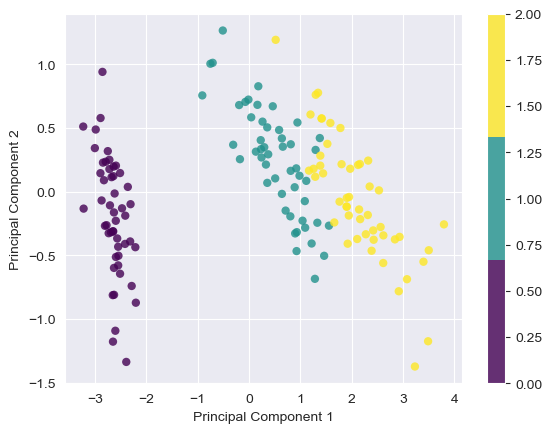

In [3]:
# Initialize and fit the PCA model
pca = PrincipalComponentAnalysis(n_components=2)
pca.fit(X)

# Transform the data
X_projected = pca.transform(X)

# Plotting the transformed data
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=y, edgecolor='none', alpha=0.8, cmap=plt.get_cmap('viridis', 3))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Our PCA implementation
our_pca = PrincipalComponentAnalysis(n_components=2)
our_pca.fit(X_train)
X_train_our = our_pca.transform(X_train)
X_test_our = our_pca.transform(X_test)

# Sklearn's PCA implementation
sklearn_pca = PCA(n_components=2)
X_train_sklearn = sklearn_pca.fit_transform(X_train)
X_test_sklearn = sklearn_pca.transform(X_test)

# k-NN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train and test using our PCA
knn.fit(X_train_our, y_train)
y_pred_our = knn.predict(X_test_our)
accuracy_our = accuracy_score(y_test, y_pred_our)

# Train and test using sklearn's PCA
knn.fit(X_train_sklearn, y_train)
y_pred_sklearn = knn.predict(X_test_sklearn)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)

accuracy_our, accuracy_sklearn

/Users/ahmedelnagar/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ahmedelnagar/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

(1.0, 1.0)